# Principal Component Analysis

## Introduction

Principal Component Analysis  (PCA) is a form of unsupervised learning that looks to use Singular Value Decomposition (SVD) to reduce the number of dimensions while retaining variance.

## What is SVD?

Singular Value Decomposition (SVD) is a method of matrix decomposition. Single Value Decomposition is a method of decomposing a matrix into its composite manipulations. Whereas spectral decomposition can only be applied to square, symmetrical matrices, SVD can be applied to **any** matrix.

## The General Formula

$$ A = U\Sigma V^T$$

* **$U$:** An orthogonal matrix whose columns are the **left singular vectors** of A.
* **$Σ$:** A diagonal matrix consisting of the singular values of A, sorted in descending order.
* **$V^T$:** The transpose of an orthogonal matrix whose columns are the **right singular vectors** of A.

For more information, see the Linear Algebra journal.

## Code

In order to use PCA, this is the code that needs to be used, as well as how to set it up. PCA is set up the same as a linear regression model, with X features and y target. The example being used is the same as in the project, daily volaility.


```
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

X = df[['Open', 'Close', 'High' 'Low']]
y = df['daily volatility']

# The data has to be split and put into test, train etc. in the usual way, 8:2 (this step is skipped)
# Now the PCA is set up using the same method as Linear Regression but set the n_components to None

# Instantiate
pca = PCA(n_components=None)

# Fit
pca.fit(X_train)

# Explained Varience has to be worked out
explained_varience = pca.explained_variance_ratio_
```

Now visualisations can be used or print statements to confirm optimum n_components.

```
import matlibplot.pyplot as plt
import seaborn as sns

plt.plot(np.cumsum(explained_varience))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained varience')
plt.title('Comparison of components against explained varience')
plt.grid(True)
plt.show()
```
This will then display a graph like this.

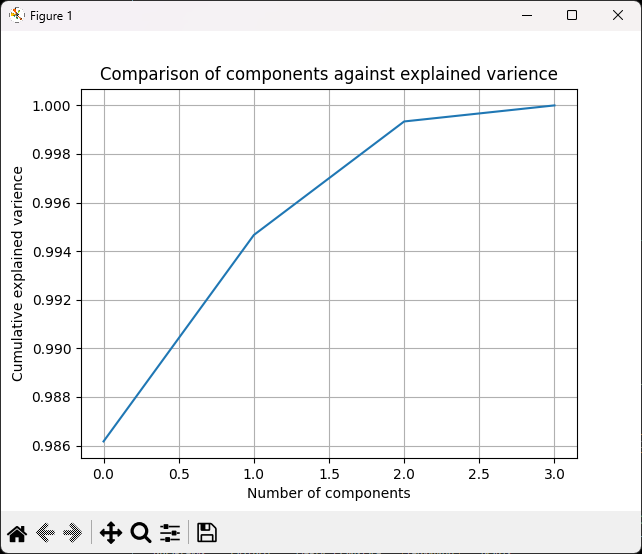

It can be seen that by having n_components=2, almost all of the data is retained while reducing the dimensions.

The final step is to run the linear regression model with the n_components ajusted to 2.

```
# First set up a new PCA with the correct n_components

pca = PCA(n_components=2)
pca.fit(X_train)

# Now apply the PCA to the training and testing features along with a transform that applies the PCA to the data thats needed.

X_test_transform = pca.transform(X_test)
X_train_transform = pca.transform(X_train)

# Now create the model in the usual way, instantiate, fit, predict
model = LinearRegression()

model.fit(X_train_transform, y_train)

y_pred = model.predict(X_test_transform)
```

